In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# create a data generator
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# load and iterate training dataset
train = datagen.flow_from_directory('mel_spectrograms/Train', class_mode='binary', color_mode="grayscale", target_size=(9, 128), batch_size=32)

# load and iterate validation dataset
val = datagen.flow_from_directory('mel_spectrograms/Validation', class_mode='binary', color_mode="grayscale", target_size=(9, 128), batch_size=32)

# load and iterate test dataset
test = datagen.flow_from_directory('mel_spectrograms/Test', class_mode='binary', color_mode="grayscale", target_size=(9, 128), batch_size=32)

Found 222032 images belonging to 2 classes.
Found 27687 images belonging to 2 classes.
Found 27835 images belonging to 2 classes.


In [10]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4),
                        strides=1,
                        activation="relu",
                        input_shape=(9, 128, 1)))
#model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))


model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="accuracy"
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 125, 32)        544       
_________________________________________________________________
flatten_1 (Flatten)          (None, 24000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 24001     
Total params: 24,545
Trainable params: 24,545
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(
    train,
    steps_per_epoch=1024,
    epochs=10,
    validation_data=val,
    validation_steps=200
)

Epoch 1/10
1024/1024 [==============================] - 15s 15ms/step - loss: 0.4125 - accuracy: 0.8243 - val_loss: 0.4835 - val_accuracy: 0.7589
Epoch 2/10
1024/1024 [==============================] - 14s 14ms/step - loss: 0.3713 - accuracy: 0.8413 - val_loss: 0.5608 - val_accuracy: 0.7456
Epoch 3/10
1024/1024 [==============================] - 15s 15ms/step - loss: 0.3588 - accuracy: 0.8463 - val_loss: 0.6071 - val_accuracy: 0.7594
Epoch 4/10
1024/1024 [==============================] - 13s 13ms/step - loss: 0.3404 - accuracy: 0.8568 - val_loss: 0.6297 - val_accuracy: 0.7580
Epoch 5/10
1024/1024 [==============================] - 14s 14ms/step - loss: 0.3456 - accuracy: 0.8535 - val_loss: 0.6692 - val_accuracy: 0.7503
Epoch 6/10
1024/1024 [==============================] - 14s 14ms/step - loss: 0.3440 - accuracy: 0.8554 - val_loss: 0.7296 - val_accuracy: 0.7322
Epoch 7/10
1024/1024 [==============================] - 14s 13ms/step - loss: 0.3398 - accuracy: 0.8581 - val_loss: 0.6854 -

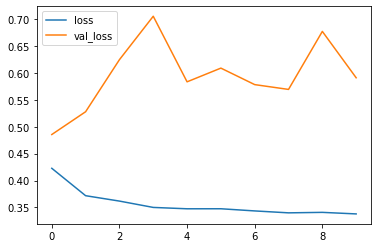

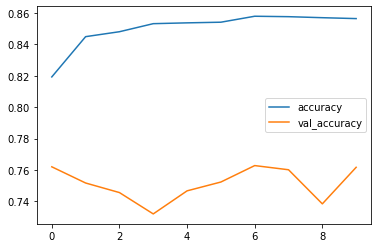

In [6]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()